In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_OIB_functions import *
import fatiando
import pandas as pd
%matplotlib inline

In [479]:
def oib_lineplot_cust(data, ptitle='test_lineplot', pname='test_lineplot'):
    import matplotlib.pyplot as plt
    data.loc[data['HYDROAPPX'] < -1500, 'HYDROAPPX'] = np.nan
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), facecolor='white')
    data['FAG070'].where((data['FLTENVIRO'] == 1)).plot(ax=axes[0], legend=True, label='Disturbed', style='r-')
    data['FAG070'].where((data['FLTENVIRO'] == 0)).plot(ax=axes[0], legend=True, label='Normal', style='k-')
    # data['FAG070'].where((data['FLTENVIRO'] == -1)).plot(ax=axes[0], legend=True, label='Missing', style='b-')
#     data['ELEVATION'].plot(ax=axes[1], legend=True, style='y.')
    data['ICEBASE'].plot(ax=axes[1], legend=True, marker=".", linestyle="None", color="brown")
    data['TOPOGRAPHY_radar'].plot(ax=axes[1], legend=True, marker=".", linestyle="None", color="blue")
#     data['HYDROAPPX'].plot(ax=axes[1], legend=True, color='grey')
    data['SURFACE_atm'].where((data['NUMUSED'] > 77)).plot(ax=axes[1], legend=True, 
                                                           marker=".", linestyle="None", color='cyan')
    plt.suptitle(ptitle, y=0.98)
#     plt.savefig(pname, bbox_inches='tight')   # save the figure to file
#     plt.close(fig)
    return


def haversine(origin, destination):
    # Source: http://www.platoscave.net/blog/2009/oct/5/calculate-distance-latitude-longitude-python/
    import math
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) \
                                                  * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(
        dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d


def make_outline(top, bottom):
    outline = np.append(top[0], np.concatenate([np.append(top, top[-1:]), np.append(bottom[-1:], bottom[::-1])], axis=0))
    outline = np.append(outline, bottom[0])
    outline = np.append(outline, top[0])
    return outline

def make_outline_dist(x, pad=1e6):
    xs = np.append(-pad, np.concatenate([np.append(x, np.max(x)+pad), np.append(np.max(x)+pad, x[::-1])], axis=0))
    xs = np.append(xs, -pad)
    xs = np.append(xs, -pad)
    return xs

In [3]:
df = pd.read_csv('data/agg2invert/OIB_ANT_2010-05-19.csv')
# oib_lineplot_cust(df)

In [4]:
segment = 1274277755
# plt.plot(df['LINE'].where((df['LINE'] == segment)))
# oib_lineplot_cust(df.where((df['LINE'] == segment)))

In [160]:
gb = df.groupby(['LINE'])

# gb.describe()

# gb['FAG070'].describe()

# Group the dataframe by regiment, and for each regiment,
for name, group in gb:
    # print(name)
    # print(group['FAG070'].describe())

IndentationError: expected an indented block (<ipython-input-160-3d10a3441030>, line 10)

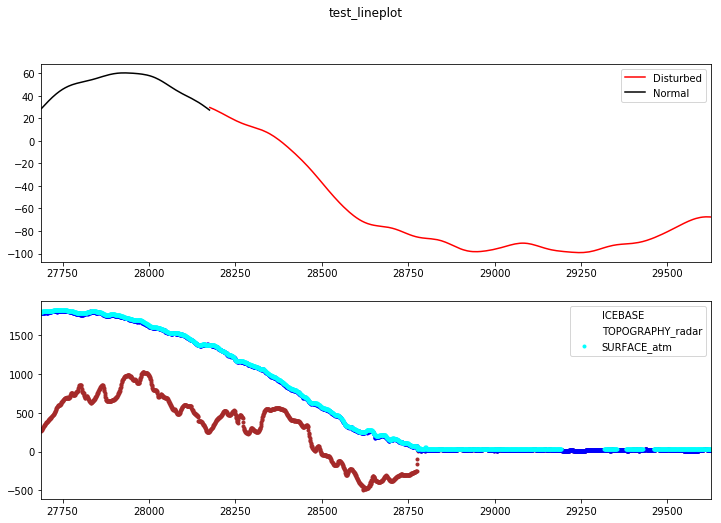

In [10]:
# gb[["TIME", "FAG070"]].get_group(segment)
lf = gb.get_group(segment)
oib_lineplot_cust(lf)

In [11]:
lf.head()

,iunix,LAT,LONG,DATE,DOY,TIME,FLT,PSX,PSY,WGSHGT,...,SURFACE_radar,BOTTOM,QUALITY,SURFACE_atm,NUMUSED,ICEBASE,TOPOGRAPHY_radar,D_gravmask,LINE,HYDROAPPX
27689,2010-05-19 14:02:35.500,72.658552,-51.769381,2010-05-19,139,50555.5,26,-223068.90,-1879253.25,2210.22,...,434.57,1949.80,1.0,1790.8337,608.0,262.0974,1777.3274,1,1274277755,NaN
27690,2010-05-19 14:02:36.000,72.657918,-51.768901,2010-05-19,139,50556.0,26,-223061.42,-1879324.81,2211.29,...,434.58,1937.49,1.0,1791.2783,603.0,275.5374,1778.4474,1,1274277755,NaN
27691,2010-05-19 14:02:36.500,72.657284,-51.768429,2010-05-19,139,50556.5,26,-223054.20,-1879396.37,2212.35,...,434.60,1925.17,1.0,1791.7584,603.0,288.9532,1779.5232,1,1274277755,NaN
27692,2010-05-19 14:02:37.000,72.656650,-51.767963,2010-05-19,139,50557.0,26,-223047.21,-1879467.94,2213.39,...,434.61,1913.97,1.0,1801.5708,616.0,301.1545,1780.5145,1,1274277755,NaN
27693,2010-05-19 14:02:37.500,72.656015,-51.767505,2010-05-19,139,50557.5,26,-223040.48,-1879539.52,2214.40,...,434.61,1907.22,1.0,1801.5708,616.0,308.8415,1781.4515,1,1274277755,NaN


# Fatiando testing

In [369]:
from fatiando.inversion import Smoothness1D
from fatiando.gravmag.basin2d import PolygonalBasinGravity
from fatiando.gravmag import talwani
from fatiando.mesher import Polygon
from fatiando.vis import mpl
from fatiando import utils
import numpy as np
from itertools import chain

rho_a = 0
rho_i = 915
rho_w = 1005
rho_r = 2670

In [14]:
# df.ix[selection criteria, columns I want] = value
lf.ix[lf['SURFACE_atm']-lf['ICEBASE'] <= 0, 'ICEBASE'] = (lf['SURFACE_atm'] - 0.1)
# lf['ICEBASE_adj'] = lf['ICEBASE'].where(lf['SURFACE_atm']-lf['ICEBASE'] <= 0)

In [167]:
# Compute distance along transect
dist = np.zeros((np.size(lf['LONG'])))
for i in range(2, np.size(lf['LONG'])):
    dist[i] = dist[i - 1] + haversine([lf['LAT'][i - 1], lf['LONG'][i - 1]], [lf['LAT'][i], lf['LONG'][i]])

KeyError: 1

In [191]:
lf.columns

Index([u'iunix', u'LAT', u'LONG', u'DATE', u'DOY', u'TIME', u'FLT', u'PSX',
       u'PSY', u'WGSHGT', u'FX', u'FY', u'FZ', u'EOTGRAV', u'FACOR', u'INTCOR',
       u'FAG070', u'FAG100', u'FAG140', u'FLTENVIRO', u'UNIX', u'THICK',
       u'ELEVATION', u'FRAME', u'SURFACE_radar', u'BOTTOM', u'QUALITY',
       u'SURFACE_atm', u'NUMUSED', u'ICEBASE', u'TOPOGRAPHY_radar',
       u'D_gravmask', u'LINE', u'HYDROAPPX', u'ICEBASE_adj'],
      dtype='object')

In [346]:
print lf.loc[:, 'TIME'].values
print lf.ix[:, 'TIME'].values
print lf.iloc[0:3, 5]
lf.loc[27689:, 'TIME'].values

[ 50555.5  50556.   50556.5 ...,  51523.   51523.5  51524. ]
[ 50555.5  50556.   50556.5 ...,  51523.   51523.5  51524. ]
27689    50555.5
27690    50556.0
27691    50556.5
Name: TIME, dtype: float64


array([ 50555.5,  50556. ,  50556.5, ...,  51523. ,  51523.5,  51524. ])

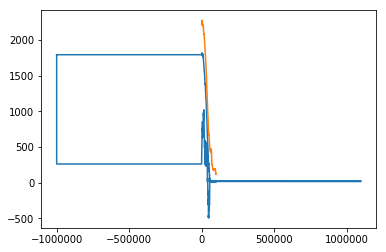

In [503]:
'''
Extract data from DataFrame
'''
fag070 = lf['FAG070'][0:].values
elevation = lf['WGSHGT'][0:].values
icesfc = lf['SURFACE_atm'][0:].values
icebase = lf['ICEBASE'][0:].values
'''
Convert OIB data to polygon arrays
'''
# iceoutline = np.append(np.concatenate([icesfc, icebase[::-1]], axis=0), icesfc[0]) # no extension
iceoutline = make_outline(icesfc, icebase)
# plt.figure(facecolor='white'); plt.plot(iceoutline[1180:1220])

rockbase = -30000*np.ones_like(icebase)
# rockoutline = np.append(icebase[0], np.concatenate([icebase, z_r], axis=0), icebase[0], icebase[0])
rockoutline = make_outline(icebase, rockbase)

x = np.linspace(0, 100000, len(icebase))#[::-1]
xs = make_outline_dist(x, 1e6)
# plt.figure(facecolor='white'); plt.plot(xs[1180:1220])

# depths of calculations points
z = elevation + 2000
# z = -500*np.ones_like(x)

plt.figure(facecolor='white'); plt.plot(xs, iceoutline); plt.plot(x, elevation)
'''
Build the Polygon
'''
props = {'density': rho_r - rho_i}
props2 = {'density': rho_r}
polygon = Polygon(np.transpose([xs, iceoutline]), props)
polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
            Polygon(np.transpose([xs, rockoutline]), props2)
            ]

## One Block

33.8210063585


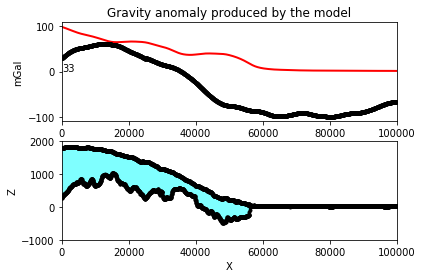

In [505]:
'''
Forward Model
'''
gz = talwani.gz(x, z, [polygon])
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz, '-r', linewidth=2)
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, '.-k', linewidth=2)
mpl.xlim(min(x), max(x))
mpl.ylabel("mGal")
ax1.annotate(str(int(rmse)), xy=(100, 0), xytext=(100, 0))
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygon, '.-k', linewidth=1, fill='cyan', alpha=0.5)
# mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
mpl.show()

## TWO blocks

9.78343238818


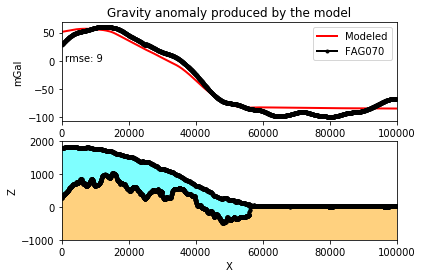

In [508]:
'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
###
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, '.-k', linewidth=2, label='FAG070')
mpl.xlim(min(x), max(x))
mpl.ylabel("mGal")
mpl.legend()
ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(1000, 0), xytext=(1000, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
mpl.savefig('figs/test_OIB_forward.png', bbox_inches='tight')
mpl.show()

# DEBUGGING

In [115]:
bottom = np.array(lf['BED_flat'])
# bottom = lf['BED_flat']
print bottom
# print lf['BED_flat'][28767]
# lf['BED_flat'][28767:b]
# lf['BED_flat'][0:]

[-1528.7363 -1515.7409 -1502.8052 ...,    -8.7095    -9.3118    -9.9288]
